In [1]:
#Import dependencies
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import csv

# Poverty and Tempurature

In [10]:
#Read drought, temperature and poverty data frame
merged_df = pd.read_csv('data_output/drought_temp_census_2010_2019.csv')

In [11]:
#Look at counties that experiences temperatures over 103.9
merged_df.loc[merged_df['Temp (F)'] >=103.9]

Unnamed: 0  Unnamed: 0.1  Year    County       None          D0  \
12           12            70  2010  Imperial  84.100769   15.899231   
70           70           128  2011  Imperial  58.449615   41.550385   
128         128           186  2012  Imperial   5.326981   94.673019   
186         186           244  2013  Imperial   0.471154   99.528846   
244         244           302  2014  Imperial   0.229231   99.770769   
302         302           360  2015  Imperial   0.000000  100.000000   
360         360           418  2016  Imperial   0.000000  100.000000   
418         418           476  2017  Imperial   0.171923   99.828077   
476         476           534  2018  Imperial   0.000000  100.000000   
546         546           604  2019  Imperial  43.450962   56.549038   
547         547           605  2019  Imperial  43.450962   56.549038   

            D1         D2         D3   D4  ...  Household Income  \
12    5.432308   0.000000   0.000000  0.0  ...           38685.0   
70    0.000000   0.000000   0.000000  0.0  ...           39402.0   
128  75.309811   0.000000   0.000000  0.0  ...           41255.0   
186  82.240192  30.569808   0.000000  0.0  ...           41807.0   
244  85.230192  63.451154   0.016923  0.0  ...           41772.0   
302  94.576923  59.536923   0.000000  0.0  ...           41079.0   
360  97.485000  84.086923   0.000000  0.0  ...           42560.0   
418  87.679423  29.024615   0.000000  0.0  ...           44779.0   
476  98.661887  74.027925  51.116226  0.0  ...           45834.0   
546  16.018654   2.043077   0.000000  0.0  ...           47622.0   
547  16.018654   2.043077   0.000000  0.0  ...           47622.0   

     Per Capita Income  Poverty Count  Poverty Rate  Location ID  Month  \
12             16395.0        33784.0     20.103301       CA-025     12   
70             16593.0        37463.0     21.864331       CA-025     12   
128            16667.0        37544.0     21.640815       CA-025     12   
186            16763.0        38286.0     21.852615       CA-025     12   
244            16409.0        38935.0     21.993944       CA-025     12   
302            16143.0        40114.0     22.509904       CA-025     12   
360            16311.0        40552.0     22.679202       CA-025     12   
418            17303.0        40376.0     22.436471       CA-025     12   
476            17590.0        41191.0     22.856461       CA-025     12   
546            18018.0        41100.0     22.744755       CA-025     12   
547            18018.0        41100.0     22.744755       CA-025     12   

     Temp (F) Rank  Anomaly (1901-2000 base period)  1901-2000 Mean  
12      108.2  123                              4.7           105.9  
70      110.0  126                              5.7           105.9  
128     106.3  123                              6.2           105.9  
186     106.5  121                              7.7           105.9  
244     107.4  126                              9.0           105.9  
302     108.7  127                              8.7           105.9  
360     109.3  127                              8.7           105.9  
418     108.5  123                              8.0           105.9  
476     107.9  125                              7.6           105.9  
546     108.2  121                              3.9           105.9  
547     108.2  121                              3.9           105.9  

[11 rows x 23 columns]

Correlation coefficient = 0.4
Linear regression model: y = 0.57x + 80.61
P-Value = 1.3399421099762888e-25


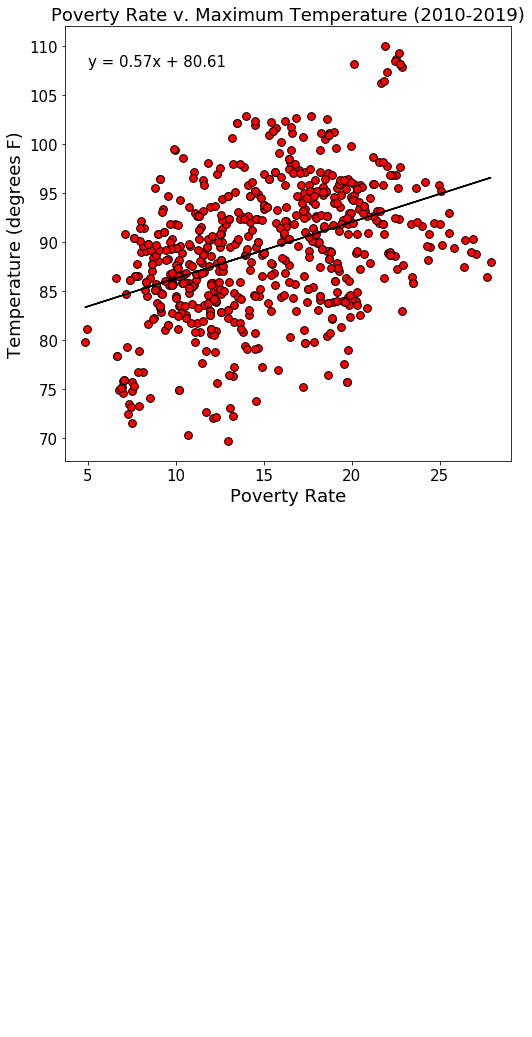

In [16]:
# Create a scatterplot for poverty rate v. maximum temperature

#Define variables
x = merged_df['Poverty Rate']
y = merged_df['Temp (F)']

#Plot data
plt.figure(figsize=(8,8))
plt.title("Poverty Rate v. Maximum Temperature (2010-2019)", fontsize = '18')
plt.xlabel("Poverty Rate", fontsize = '18')
plt.ylabel("Temperature (degrees F)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="red",edgecolors="black",s=60)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,108),fontsize=15,color="black")

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

plt.savefig('data_output/Figures/MaxTemp_PovertyRate.png')

plt.show()

# Poverty and drought

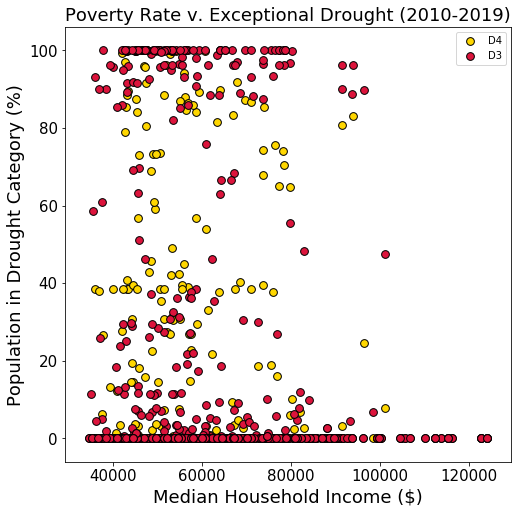

In [18]:
# Create a scatterplot for income v. drought category

#Define variables
x = merged_df['Household Income']
y = merged_df['D4']
y2 = merged_df['D3']
#Plot data

plt.figure(figsize=(8,8))
plt.xlabel("Median Household Income ($)", fontsize = '18')
plt.ylabel("Population in Drought Category (%)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="gold",edgecolors="black",s=60,label ='D4')
cap_plot = plt.scatter(x,y2, marker="o", color="crimson",edgecolors="black",s=60,label ='D3')
plt.legend()
plt.title("Poverty Rate v. Exceptional Drought (2010-2019)", fontsize = '18')
plt.savefig('data_output/Figures/D4_D3_Income.png')

plt.show()

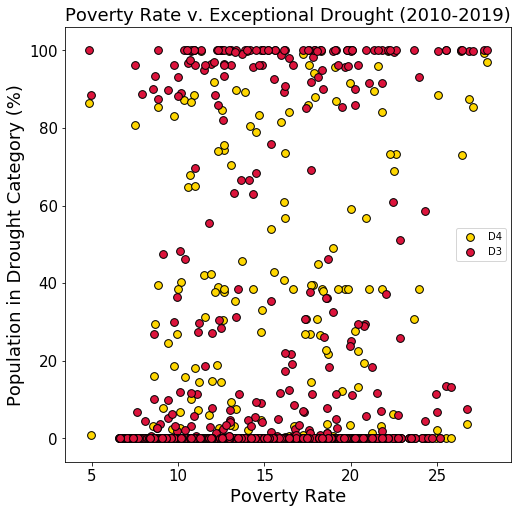

In [20]:
# Create a scatterplot for poverty rate v. drought category

#Define variables
x = merged_df['Poverty Rate']
y = merged_df['D4']
y2 = merged_df['D3']
#Plot data

plt.figure(figsize=(8,8))
plt.xlabel("Poverty Rate", fontsize = '18')
plt.ylabel("Population in Drought Category (%)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="gold",edgecolors="black",s=60,label ='D4')
cap_plot = plt.scatter(x,y2, marker="o", color="crimson",edgecolors="black",s=60,label ='D3')
plt.legend()
plt.title("Poverty Rate v. Exceptional Drought (2010-2019)", fontsize = '18')
plt.savefig('data_output/Figures/D4_D3_PovertyRate.png')

plt.show()